# **TIDY DATA**

![tidyData](tame_vs_tidy.png)

### Concepto originario de R [(link al artículo original de 2014)](https://www.jstatsoft.org/article/view/v059i10) para simplificar el preprocesado de los datos, que suele consumir alrededor del 70% del tiempo de trabajo. En R ha dado origen a todo un ecosistema de paquetes, el *tidyverse*, y poco a poco se va extendiendo a Python.

- ### Each variable must have its own column.
- ### Each observation must have its own row.
- ### Each type of observational unit forms a table.

In [1]:
import pandas as pd

In [2]:
test_scores = pd.DataFrame([['John', 78, 79, 56, 95], ['Alice', 58, 72, 91, 81], ['Rachel', 22, 61, 88, 64], ['Tom', 68, 89, 56, 83]], 
                           columns = ['Student', 'Physics', 'Chemistry', 'Englisn', 'Math']) 

In [3]:
test_scores

,Student,Physics,Chemistry,Englisn,Math
0,John,78,79,56,95
1,Alice,58,72,91,81
2,Rachel,22,61,88,64
3,Tom,68,89,56,83


### `pandas` incorpora la función `melt` para *limpiar* los datos:

In [4]:
test_scores_tidy = pd.melt(
    test_scores,
    id_vars=['Student'],
    var_name=['Subject'],
    value_name='Score'
)

In [5]:
test_scores_tidy

,Student,Subject,Score
0,John,Physics,78
1,Alice,Physics,58
2,Rachel,Physics,22
3,Tom,Physics,68
4,John,Chemistry,79
5,Alice,Chemistry,72
6,Rachel,Chemistry,61
7,Tom,Chemistry,89
8,John,Englisn,56
9,Alice,Englisn,91


### Devolvemos los datos a su estado original con `pivot`

In [6]:
test_scores_tidy.pivot(index='Student', columns='Subject')

Score                     
Subject Chemistry Englisn Math Physics
Student                               
Alice          72      91   81      58
John           79      56   95      78
Rachel         61      88   64      22
Tom            89      56   83      68

### Para el caso particular de imágenes:

In [7]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

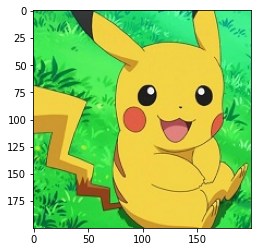

In [8]:
img = mpimg.imread('pikachu.jpg')
plt.imshow(img)

### La imagen es un array numpy con 200 filas, 200 columnas y 3 canales de color:

In [9]:
type(img)

numpy.ndarray

In [10]:
img.shape

(200, 200, 3)

In [11]:
img

array([[[ 46, 199,  75],
        [ 16, 167,  54],
        [ 52, 199, 108],
        ...,
        [ 58, 240, 140],
        [ 58, 240, 140],
        [ 53, 235, 135]],

       [[ 42, 196,  72],
        [ 33, 186,  70],
        [ 42, 192,  95],
        ...,
        [ 56, 238, 138],
        [ 57, 239, 139],
        [ 54, 236, 136]],

       [[ 56, 212,  85],
        [ 48, 203,  83],
        [ 40, 193,  87],
        ...,
        [ 53, 235, 135],
        [ 54, 236, 136],
        [ 52, 234, 134]],

       ...,

       [[ 75, 237,  89],
        [ 77, 236,  92],
        [ 84, 239, 103],
        ...,
        [  0, 128,  43],
        [  0, 137,  39],
        [ 64, 210, 103]],

       [[ 76, 245,  94],
        [ 32, 199,  50],
        [ 17, 175,  36],
        ...,
        [  0, 128,  47],
        [ 30, 170,  71],
        [ 76, 219, 111]],

       [[ 46, 216,  65],
        [ 18, 186,  37],
        [ 29, 190,  50],
        ...,
        [  3, 134,  54],
        [ 67, 207, 108],
        [ 40, 183,  75]]

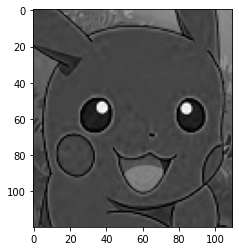

In [12]:
plt.imshow(img[20:140, 70:180, 2], cmap='gray')

### Creamos un `DataFrame` con los datos reestructurados mediante `reshape`. Por último añadimos las coordenadas de los píxeles con `repeat` y `tile`:

In [13]:
import numpy as np

imgTidy = pd.DataFrame(img.reshape((200*200,3)),
                       columns=['R', 'G', 'B'])

imgTidy['X'] = np.repeat(range(200), 200)

imgTidy['Y'] = np.tile(range(200), 200)

In [14]:
imgTidy

,R,G,B,X,Y
0,46,199,75,0,0
1,16,167,54,0,1
2,52,199,108,0,2
3,9,155,72,0,3
4,0,143,58,0,4
...,...,...,...,...,...
39995,0,127,56,199,195
39996,0,126,55,199,196
39997,3,134,54,199,197
39998,67,207,108,199,198
